In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

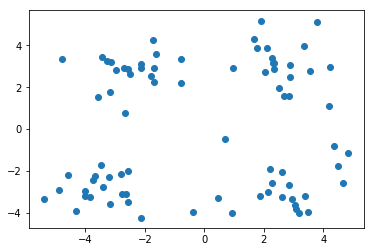

In [2]:
#iris = pd.read_csv('E:/testSet.txt',header = None)
iris = pd.read_table('E:/testSet.txt',header = None)
plt.scatter(iris.iloc[:,0].values,iris.iloc[:,1].values);

In [3]:
def distEclud(arrA, arrB):
    d = arrA - arrB
    dist = np.sum(np.power(d, 2), axis=1)
    return dist

In [4]:
def randCent(dataSet, k): 
    n = dataSet.shape[1]
    data_min = dataSet.iloc[:, :n].min()
    data_max = dataSet.iloc[:, :n].max()
    data_cent = np.random.uniform(data_min,data_max,(k, n))
    return data_cent

In [5]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m,n = dataSet.shape
    centroids = createCent(dataSet, k)
    clusterAssment = np.zeros((m,3))
    clusterAssment[:, 0] = np.inf
    clusterAssment[:, 1: 3] = -1
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis=1, ignore_index = True)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            dist = distMeas(dataSet.iloc[i, :n].values, centroids)
            result_set.iloc[i, n] = dist.min()
            result_set.iloc[i, n+1] = np.where(dist == dist.min())[0]
        clusterChanged = not (result_set.iloc[:, -1] == result_set.iloc[:, -2]).all()
        if clusterChanged:
            cent_df = result_set.groupby(n+1).mean()
            centroids = cent_df.iloc[:,:n].values
            result_set.iloc[:, -1] = result_set.iloc[:, -2]
    return centroids, result_set

In [6]:
centroids, result = kMeans(iris,4)

In [7]:
centroids

array([[-2.46154315,  2.78737555],
       [ 2.80293085, -2.7315146 ],
       [-3.38237045, -2.9473363 ],
       [ 2.6265299 ,  3.10868015]])

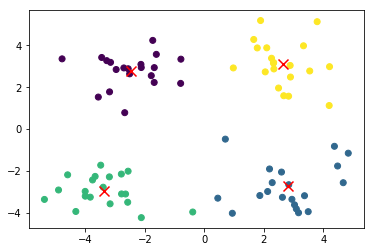

In [8]:
plt.scatter(result.iloc[:,0], result.iloc[:, 1], c=result.iloc[:, -1])
plt.scatter(centroids[:, 0], centroids[:, 1], color='red',marker='x',s=100);

In [9]:
result

,0,1,2,3,4
0,1.658985,4.285136,2.320192,3.0,3.0
1,-3.453687,3.424321,1.390049,0.0,0.0
2,4.838138,-1.151539,6.638391,1.0,1.0
3,-5.379713,-3.362104,4.161410,2.0,2.0
4,0.972564,2.924086,2.769678,3.0,3.0
5,-3.567919,1.531611,2.801012,0.0,0.0
6,0.450614,-3.302219,5.859098,1.0,1.0
7,-3.487105,-1.724432,1.506464,2.0,2.0
8,2.668759,1.594842,2.293489,3.0,3.0
9,-3.156485,3.191137,0.645967,0.0,0.0


In [133]:
m, n = iris_result.shape
print(m,n)

150 5


In [134]:
nc = len(centroids)
nc

4

In [140]:
def silhouetteCoe(result):
    result_set = result.copy()
    m, n = result.shape
    nc = len(centroids)
    for i in range(nc):
        result_set[n+i]=0
    result_list = []
    for i in range(nc):
        result_temp = result_set[result_set.iloc[:, n-1] == i]
        result_temp.index = range(result_temp.shape[0])
        result_list.append(result_temp)
    for i in range(m):
        for j in range(nc):
            result_set.iloc[i,n+j]=distEclud(result_set.iloc[i, :n-3].values,result_list[j].iloc[:, :n-3].values).mean()
    result_set["a"]=0
    result_set["b"]=0
    for i in range(m):
        l_temp=[]
        for j in range(nc):
            if(result_set.iloc[i,n-1] == j):
                result_set.loc[i,"a"] = result_set.iloc[i, n+j]
            else:
                l_temp.append(result_set.iloc[i, n+j])
        result_set.loc[i,"b"] = np.array(l_temp).min()
    result_set["s"] = (result_set.loc[:,"b"]-result_set.loc[:,"a"]) / result_set.loc[:,"a":"b"].max(axis=1)
    return result_set["s"].mean()

In [141]:
centroids, result = kMeans(iris, 4)
silhouetteCoe(result)

0.8471129553559452

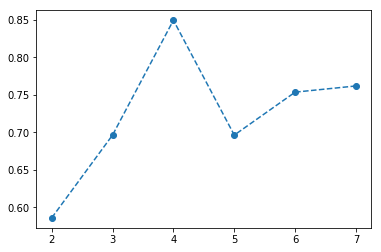

In [146]:
sil = []
for i in range(1,7):
    centroids, result = kMeans(iris, i+1)
    sil.append(silhouetteCoe(result))

plt.plot(range(2,8), sil, '--o')
plt.savefig("6.png")